<img src="https://media.giphy.com/media/YWUpVw86AtIbe/giphy.gif" width=100%>

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import pandas as pd

In [3]:
import imblearn
print(imblearn.__version__)

0.13.0


In [4]:
df=pd.read_csv("predictive_maintenance.csv")

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [8]:
df.iloc[:,-1].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

# Covering Memory Leak
 ### Can not use both Target and Failure Type at the same time. As both of them together will have Data leak. 


In [9]:
df.drop(df.columns[:2],axis=1,inplace=True)

In [10]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


# EDA

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('ggplot')

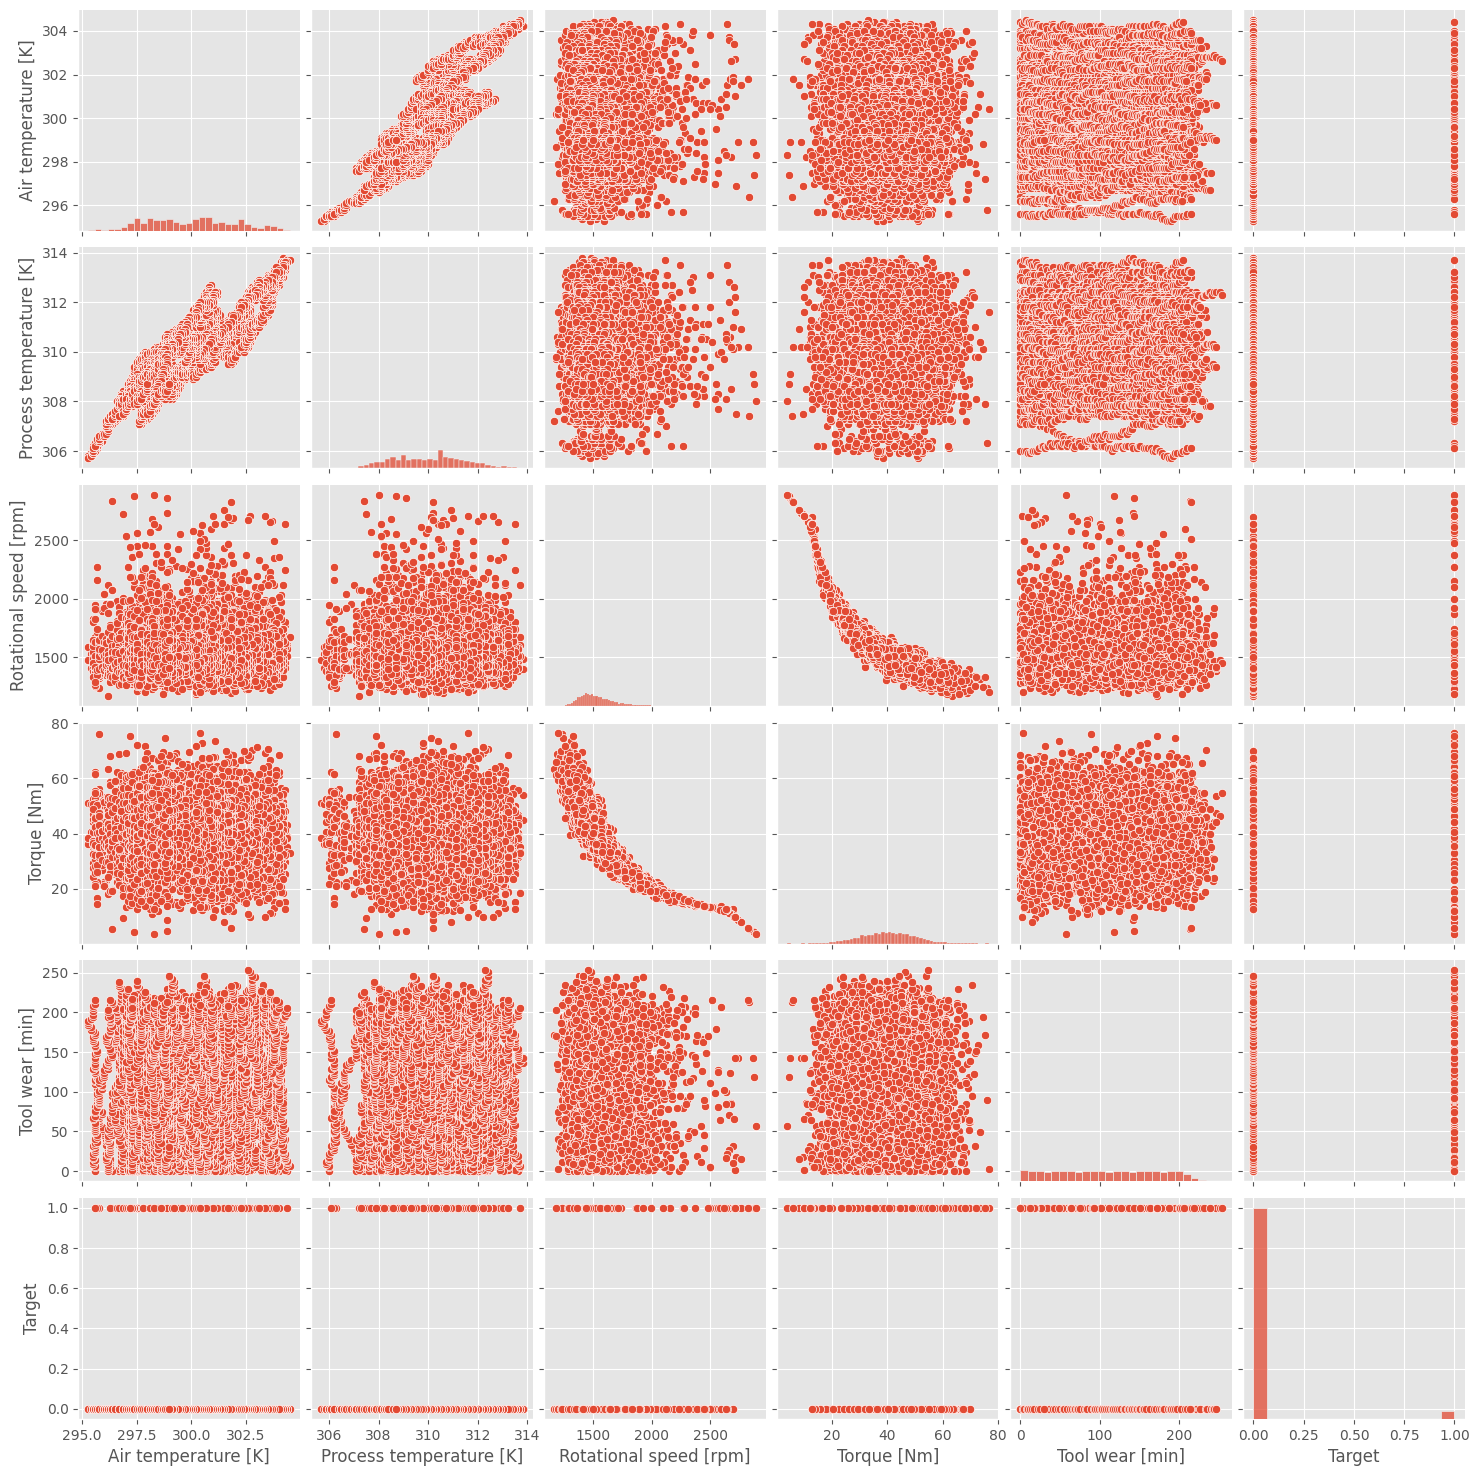

In [12]:
sns.pairplot(df)

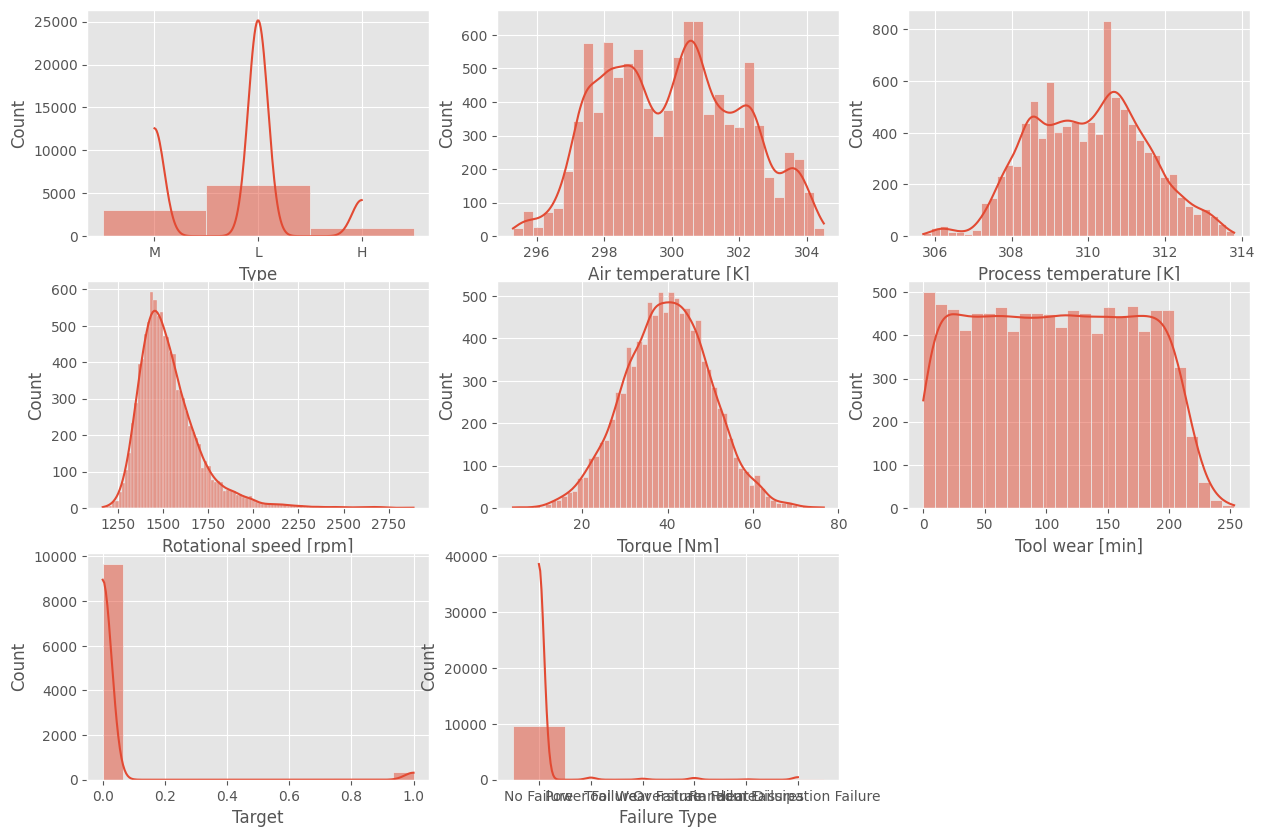

In [13]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

In [14]:
from sklearn .preprocessing import LabelEncoder
encode=LabelEncoder()

In [15]:
df.loc[:,df.columns[-1]]=encode.fit_transform(df.loc[:,df.columns[-1]])

In [16]:
encode.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [17]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,1
1,L,298.2,308.7,1408,46.3,3,0,1
2,L,298.1,308.5,1498,49.4,5,0,1
3,L,298.2,308.6,1433,39.5,7,0,1
4,L,298.2,308.7,1408,40.0,9,0,1


In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test = train_test_split(df,test_size = 0.3)

In [19]:
df = X_train

In [20]:
df.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1421,L,298.7,309.8,1589,31.8,217,0,1
269,L,298.0,308.0,1524,37.0,49,0,1
2894,L,300.7,309.6,1733,24.8,85,0,1
4920,L,303.4,312.2,1337,69.4,52,1,3
5690,L,302.3,311.8,1435,44.8,98,0,1


## Need to min max Scaler on Roatation speed and Standard scaller on all
- ### Use MinMaxScaler as your default
- ### Use RobustScaler if you have outliers and can handle a larger range
- ### Use StandardScaler if you need normalized features
- ### Use Normalizer sparingly - it normalizes rows, not columns

Columns retained for correlation analysis:
Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')


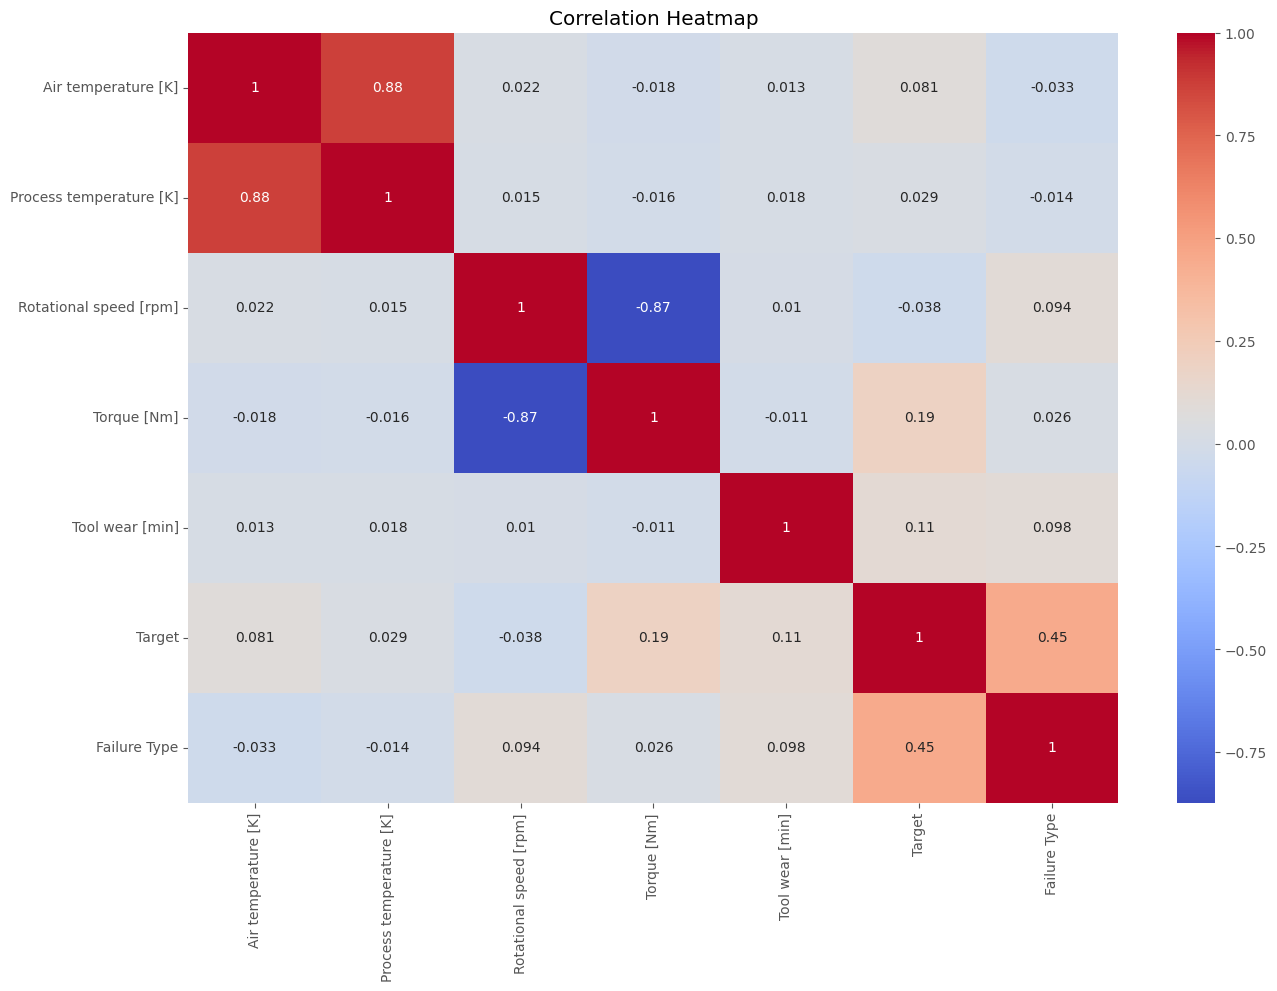

In [21]:
# Convert non-numeric columns to numeric where possible
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop columns that cannot be converted to numeric
df_numeric = df_numeric.dropna(axis=1, how='any')  # Drop columns with NaN values

# Check the resulting DataFrame
print("Columns retained for correlation analysis:")
print(df_numeric.columns)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

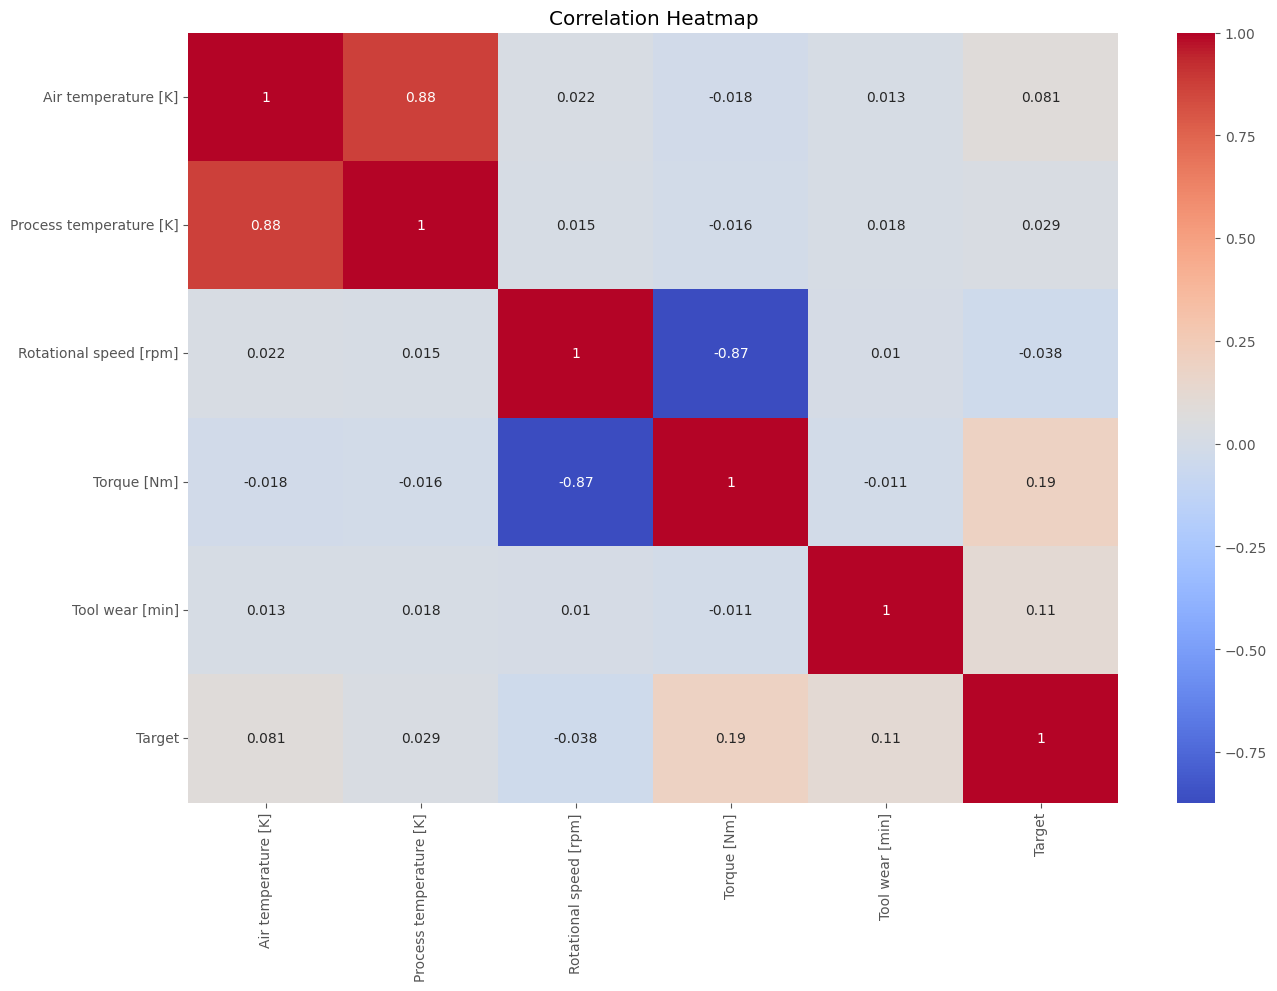

In [22]:
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,299.999214,310.001857,1538.350429,40.026200,107.700286,0.034429
std,2.001786,1.491447,180.572581,9.944385,63.423326,0.182340
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.300000,53.000000,0.000000
50%,300.000000,310.100000,1502.000000,40.200000,107.000000,0.000000
75%,301.500000,311.100000,1611.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.200000,253.000000,1.000000


In [24]:
df.drop(df.columns[-2],axis=1,inplace=True)

In [25]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
1421,L,298.7,309.8,1589,31.8,217,1
269,L,298.0,308.0,1524,37.0,49,1
2894,L,300.7,309.6,1733,24.8,85,1
4920,L,303.4,312.2,1337,69.4,52,3
5690,L,302.3,311.8,1435,44.8,98,1


In [26]:
df[df.columns[-1]].value_counts()

Failure Type
1    6754
0      83
3      67
2      57
5      28
4      11
Name: count, dtype: int64

In [27]:
df.Type.value_counts()

Type
L    4218
M    2065
H     717
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
#df=pd.get_dummies(df,drop_first=True)

In [30]:
#X_test = pd.get_dummies(X_test,drop_first=True)

In [31]:
X_test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
173,M,298.2,308.0,1591,33.7,32,0,1
1867,L,298.1,307.9,1502,41.8,79,0,1
3516,L,302.0,311.1,1402,47.8,182,0,1
1937,L,298.2,308.0,1411,42.4,48,0,1
7145,L,300.5,310.0,1413,44.5,152,0,1


In [32]:
X_test.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
8724,M,297.2,308.6,1513,39.0,78,0,1
4802,M,303.5,312.4,1318,54.2,177,0,1
6780,L,301.3,310.8,1560,38.5,52,0,1
5931,L,300.3,310.4,1336,54.4,52,0,1
53,L,298.7,309.0,1565,35.1,152,0,1


In [33]:
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [34]:
df=df.sample(frac=1).reset_index(drop=True)

In [35]:
df.columns=df.columns.astype("str")

In [36]:
col_name=df.columns.to_list()

In [37]:
col_name

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type']

In [38]:
target_col=col_name.pop(-3)

In [39]:
feature_col=col_name

In [40]:
target_col

'Torque [Nm]'

In [41]:
feature_col

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Tool wear [min]',
 'Failure Type']

In [42]:
y=df["Failure Type"].values

# Implementing Oversampling Due to Data Imbalance

In [43]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [44]:
df_train=df.drop(df.columns[-3],axis=1)

In [45]:
df_train_val=df_train.values

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek

# Convert all categorical columns to numeric using one-hot encoding
df_train_encoded = pd.get_dummies(df_train, drop_first=True)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Now fit SMOTETomek
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(df_train_encoded.values, y_encoded)

print("Resampled shapes:", X_res.shape, y_res.shape)

Resampled shapes: (40416, 11) (40416,)


In [51]:
X_res.shape,y_res.shape

((40416, 11), (40416,))

In [52]:
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({np.int64(1): 6754, np.int64(0): 83, np.int64(3): 67, np.int64(2): 57, np.int64(5): 28, np.int64(4): 11})
Resampled Dataset Shape Counter({np.int64(2): 6752, np.int64(5): 6751, np.int64(0): 6747, np.int64(4): 6744, np.int64(3): 6719, np.int64(1): 6703})


In [53]:
df_new=pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)

In [54]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,10,0
0,298.3,309.0,1379.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,300.5,311.6,1534.0,90.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,298.4,307.9,1544.0,132.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,297.3,308.1,1642.0,206.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,298.8,308.6,1707.0,103.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1


In [56]:
# After SMOTETomek
import pandas as pd

# Use the columns from the encoded features and add the target column name
col_new = list(df_train_encoded.columns) + [target_col]  # target_col should be a string, e.g., "Failure Type"
df_new = pd.concat([pd.DataFrame(X_res, columns=df_train_encoded.columns), pd.DataFrame(y_res, columns=[target_col])], axis=1)
df_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],Type_L,Type_M,Failure Type_1,Failure Type_2,Failure Type_3,Failure Type_4,Failure Type_5,Torque [Nm]
0,298.3,309.0,1379.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,300.5,311.6,1534.0,90.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,298.4,307.9,1544.0,132.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,297.3,308.1,1642.0,206.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,298.8,308.6,1707.0,103.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1


In [57]:
#import plotly.plotly as py
! pip install chart-studio
from chart_studio import plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# ❔ Checking for outliers

In [58]:
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Tool wear [min]', 'Type_L', 'Type_M',
       'Failure Type_1', 'Failure Type_2', 'Failure Type_3', 'Failure Type_4',
       'Failure Type_5', 'Torque [Nm]'],
      dtype='object')


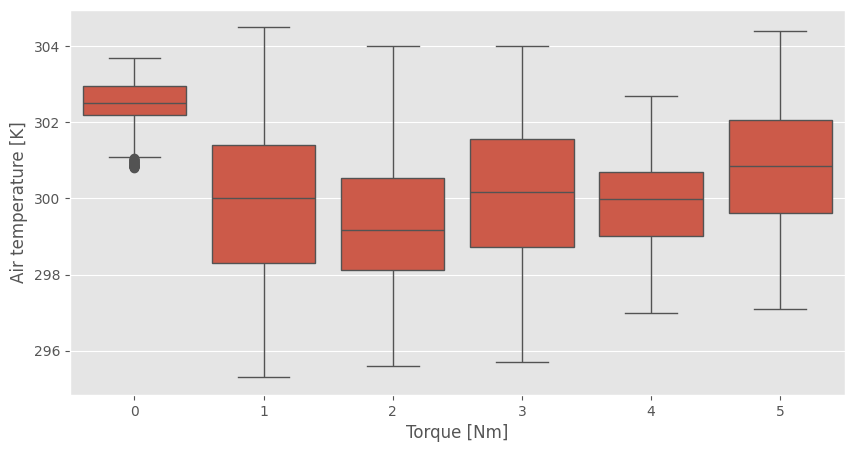

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the actual column names
print(df_new.columns)

# Example: Use the correct column names as per your df_new
mpl_fig = plt.figure(figsize=(10,5))
sns.boxplot(y="Air temperature [K]", x=target_col, data=df_new)
plt.show()

<Axes: xlabel='Failure Type_3', ylabel='Air temperature [K]'>

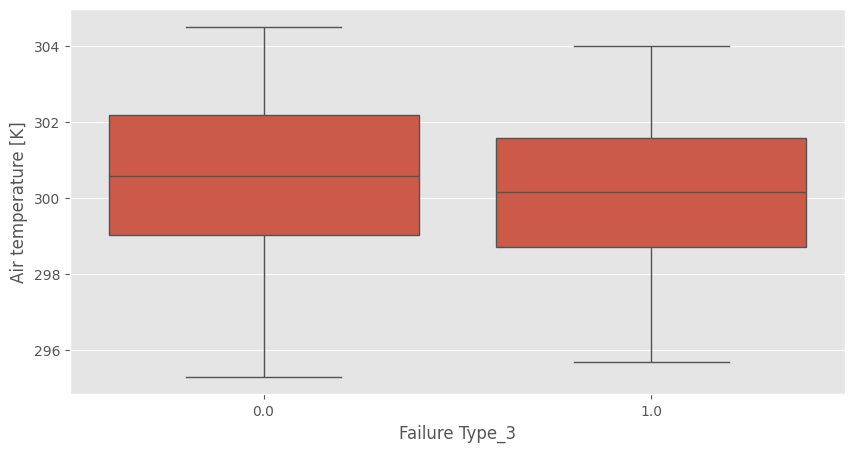

In [62]:
## Checking in Process Temp
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[1],x="Failure Type_3",data=df_new)

<Axes: xlabel='Failure Type_3', ylabel='Process temperature [K]'>

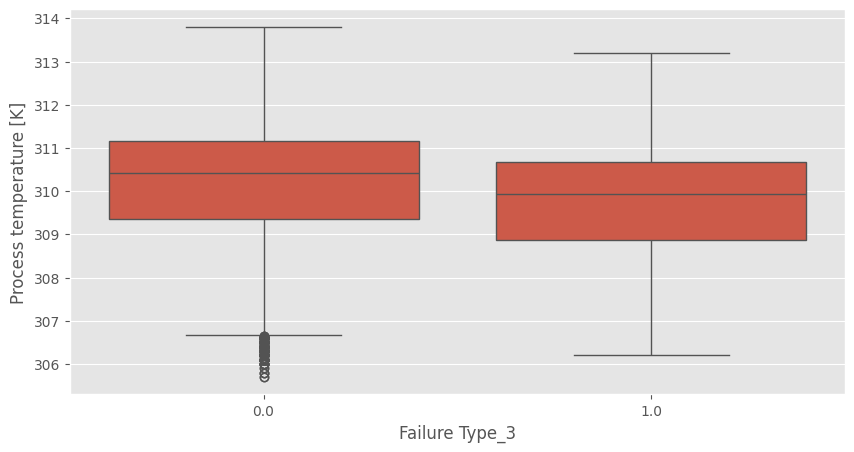

In [63]:
## Checking in Rotational Speed

plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[2],x="Failure Type_3",data=df_new)

<Axes: xlabel='Failure Type_3', ylabel='Rotational speed [rpm]'>

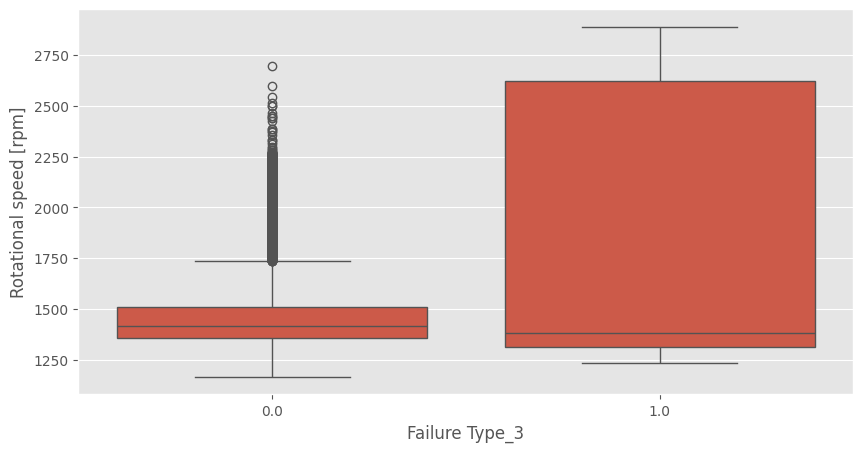

In [65]:
## Checking in Torque
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[3],x="Failure Type_3",data=df_new)

<Axes: xlabel='Failure Type_3', ylabel='Tool wear [min]'>

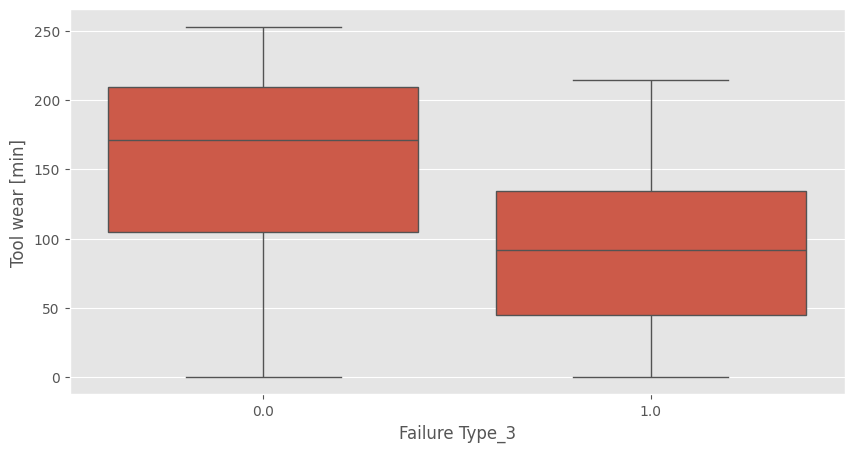

In [66]:
## Checking in Tool wear
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[4],x="Failure Type_3",data=df_new)

<Axes: xlabel='Failure Type_3', ylabel='count'>

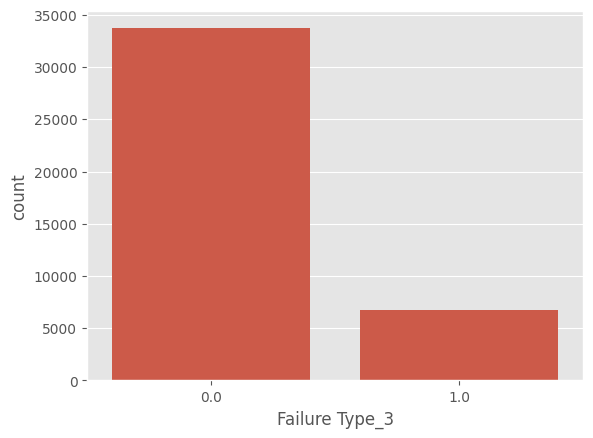

In [67]:
sns.countplot(x="Failure Type_3",data=df_new)

In [68]:
# As the data here is imbalanced we need to use 
y_res

array([1, 1, 1, ..., 5, 5, 5], shape=(40416,))

# Using Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
acc_log=[]

In [70]:
# ## Building a Classification model using 
# kf=model_selection.StratifiedKFold(n_splits=5)
# for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
#     X_train=df_new.loc[trn_,feature_col]
#     y_train=df_new.loc[trn_,target_col]
    
#     X_valid=df_new.loc[val_,feature_col]
#     y_valid=df_new.loc[val_,target_col]
    
#     ro_scaler=RobustScaler()
#     X_train=ro_scaler.fit_transform(X_train)
#     X_valid=ro_scaler.transform(X_valid)
    
#     clf=LogisticRegression()
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_valid)
#     print(f"The fold is : {fold} : ")
#     print(classification_report(y_valid,y_pred))
#     acc=roc_auc_score(y_valid,y_pred)
#     acc_log.append(acc)
#     print(f"The accuracy for {fold} : {acc}")
#     pass
    

# Using Naive Bayers

In [71]:
X_test[target_col].values

array([33.7, 41.8, 47.8, ..., 38.5, 54.4, 35.1], shape=(3000,))

In [72]:
X_test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
173,M,298.2,308.0,1591,33.7,32,0,1
1867,L,298.1,307.9,1502,41.8,79,0,1
3516,L,302.0,311.1,1402,47.8,182,0,1
1937,L,298.2,308.0,1411,42.4,48,0,1
7145,L,300.5,310.0,1413,44.5,152,0,1


In [73]:
X_test[target_col].values

array([33.7, 41.8, 47.8, ..., 38.5, 54.4, 35.1], shape=(3000,))

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler

acc_Gauss = []
kf = model_selection.StratifiedKFold(n_splits=5)

# Use the correct feature columns and target column
feature_columns = list(df_train_encoded.columns)  # after get_dummies
target_column = target_col  # this should be a string, e.g., "Failure Type"

for fold, (trn_, val_) in enumerate(kf.split(X=df_new, y=y_res)):
    X_train = df_new.iloc[trn_][feature_columns]
    y_train = df_new.iloc[trn_][target_column]
    X_valid = df_new.iloc[val_][feature_columns]
    y_valid = df_new.iloc[val_][target_column]
    x_test_split = X_test[feature_columns]  # Make sure X_test is also encoded the same way

    ro_scaler = RobustScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    x_test_split = ro_scaler.transform(x_test_split)

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(y_pred)
    print(classification_report(X_test[target_column].values, y_pred))

KeyError: "['Type_L', 'Type_M', 'Failure Type_1', 'Failure Type_2', 'Failure Type_3', 'Failure Type_4', 'Failure Type_5'] not in index"

# Using SVM(Support Vector Machines)
### We need to choose the best Kernel according to our need.

- #### The linear kernel is mostly preferred for text classification problems as it performs well for large datasets. 
- #### Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- #### Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- #### Polynomial kernels give good results for problems where all the training data is normalized. 


In [78]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler

acc_svm = []
kf = model_selection.StratifiedKFold(n_splits=5)

feature_columns = list(df_train_encoded.columns)
target_column = target_col  # should be a string, e.g., "Failure Type"

for fold, (trn_, val_) in enumerate(kf.split(X=df_new, y=y_res)):
    if all(col in df_new.columns for col in feature_col) and target_col in df_new.columns:
        X_train = df_new.loc[trn_, feature_col]
        y_train = df_new.loc[trn_, target_col]
        X_valid = df_new.loc[val_, feature_col]
        y_valid = df_new.loc[val_, target_col]
        x_test_split = X_test[feature_col]
        y_test = X_test[target_col]
    else:
        X_train = df_new.iloc[trn_][feature_columns]
        y_train = df_new.iloc[trn_][target_column]
        X_valid = df_new.iloc[val_][feature_columns]
        y_valid = df_new.iloc[val_][target_column]
        # Ensure X_test is encoded the same way
        X_test_encoded = pd.get_dummies(X_test, drop_first=True)
        X_test_encoded = X_test_encoded.reindex(columns=feature_columns, fill_value=0)
        x_test_split = X_test_encoded
        y_test = X_test[target_column]  # Make sure this is integer-encoded

    # Ensure y_test is integer type
    y_test = y_test.astype(int)

    ro_scaler = RobustScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    x_test_split = ro_scaler.transform(x_test_split)

    clf = SVC(kernel="linear")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_test, y_pred))

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       4.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       3.0
          15       0.00      0.00      0.00       6.0
          16       0.00      0.00      0.00       8.0
          17       0.00      0.00      0.00       7.0
          18       0.00      0.00      0.00       9.0
          19       0.00      0.00      0.00      16.0
          20       0.00      0.00      0.00      24.0
        

In [ ]:
# from sklearn.svm import SVC
# acc_svm_sig=[]
# kf=model_selection.StratifiedKFold(n_splits=5)
# for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
#     X_train=df_new.loc[trn_,feature_col]
#     y_train=df_new.loc[trn_,target_col]
    
#     X_valid=df_new.loc[val_,feature_col]
#     y_valid=df_new.loc[val_,target_col]
    
#     ro_scaler=RobustScaler()
#     X_train=ro_scaler.fit_transform(X_train)
#     X_valid=ro_scaler.transform(X_valid)
    
#     clf=SVC(kernel="sigmoid")
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_valid)
#     print(f"The fold is : {fold} : ")
#     print(classification_report(y_valid,y_pred))
# #     acc=accuracy_score(y_valid,y_pred)
# #     acc_svm_sig.append(acc)
# #     print(f"The accuracy for {fold} : {acc}")

In [79]:
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_svm_rbf.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

KeyError: "['Type', 'Failure Type'] not in index"

In [80]:
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_svm_poly.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

KeyError: "['Type', 'Failure Type'] not in index"

# Using  KNN
## The optimal K value usually found is the square root of N, where N is the total number of samples.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=KNeighborsClassifier(n_neighbors=4)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_KNN.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.74      0.96      0.84        27

    accuracy                           1.00      3000
   macro avg       0.87      0.98      0.92      3000
weighted avg       1.00      1.00      1.00      3000

The fold is : 1 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.70      0.96      0.81        27

    accuracy                           1.00      3000
   macro avg       0.85      0.98      0.91      3000
weighted avg       1.00      1.00      1.00      3000

The fold is : 2 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.72      0.96      0.83        27

    accuracy                           1.00      3000
   macro avg       0.86      0.98      0.91      3000
weighted avg     

# 🌲 Using Decission tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_Dtree.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.93      1.00      0.96        27

    accuracy                           1.00      3000
   macro avg       0.97      1.00      0.98      3000
weighted avg       1.00      1.00      1.00      3000

The fold is : 1 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.93      1.00      0.96        27

    accuracy                           1.00      3000
   macro avg       0.97      1.00      0.98      3000
weighted avg       1.00      1.00      1.00      3000

The fold is : 2 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.93      1.00      0.96        27

    accuracy                           1.00      3000
   macro avg       0.97      1.00      0.98      3000
weighted avg     

In [ ]:
# import time
# while True:
#     print("5")
#     time.sleep(60)

# 🚄 Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=RandomForestClassifier(n_estimators=55,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_RandF.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.90      0.96      0.93        27

    accuracy                           1.00      3000
   macro avg       0.95      0.98      0.96      3000
weighted avg       1.00      1.00      1.00      3000

The fold is : 1 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.93      0.96      0.95        27

    accuracy                           1.00      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       1.00      1.00      1.00      3000

The fold is : 2 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.90      0.96      0.93        27

    accuracy                           1.00      3000
   macro avg       0.95      0.98      0.96      3000
weighted avg     

# 🚄 Using XGBoost

In [ ]:
class_failure=encode.classes_

In [ ]:
class_failure

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [ ]:
# Checking the best accuracy in K-SVM using which Kernel;
fold_list=["Fold 1","Fold 2","Fold 3","Fold 4","Fold 5"]


In [ ]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_XGB.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.93      1.00      0.96        27

    accuracy                           1.00      3000
   macro avg       0.97      1.00      0.98      3000
weighted avg       1.00      1.00      1.00      3000

The fold is : 1 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.93      1.00      0.96        27

    accuracy                           1.00      3000
   macro avg       0.97      1.00      0.98      3000
weighted avg       1.00      1.00      1.00      3000

The fold is : 2 : 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2973
        True       0.93      1.00      0.96        27

    accuracy                           1.00      3000
   macro avg       0.97      1.00      0.98      3000
weighted avg     

In [ ]:
import pickle
with open("XG_boost_pkl","wb") as files:
    pickle.dump(clf,files)


In [ ]:
import pickle
import joblib

# Load the model from the .pkl file
with open("XG_boost_pkl", "rb") as f:
    model = pickle.load(f)

# Save the model to a .joblib file
joblib.dump(model, "xgb_model_fold_4.joblib")

['xgb_model_fold_4.joblib']

# 🔚 Summary
### As we can see from the 97% AUC that we obtained using Random Forest as well as XGBoost

# Please Upvote If You Felt this was Helpfull
<img src="https://media.giphy.com/media/1BFEEIo4h1BuTH8eqP/giphy.gif">

In [ ]:
# # load saved model
# with open('model_pkl' , 'rb') as f:
#     lr = pickle.load(f)